In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("supermarket_sales.csv")

In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [7]:
# Data Cleaning and Preparation
# Handle missing values
df.dropna(inplace=True)

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:

# Descriptive statistics
average_unit_price = df['Unit price'].mean()
total_sales_per_branch = df.groupby('Branch')['Total'].sum()

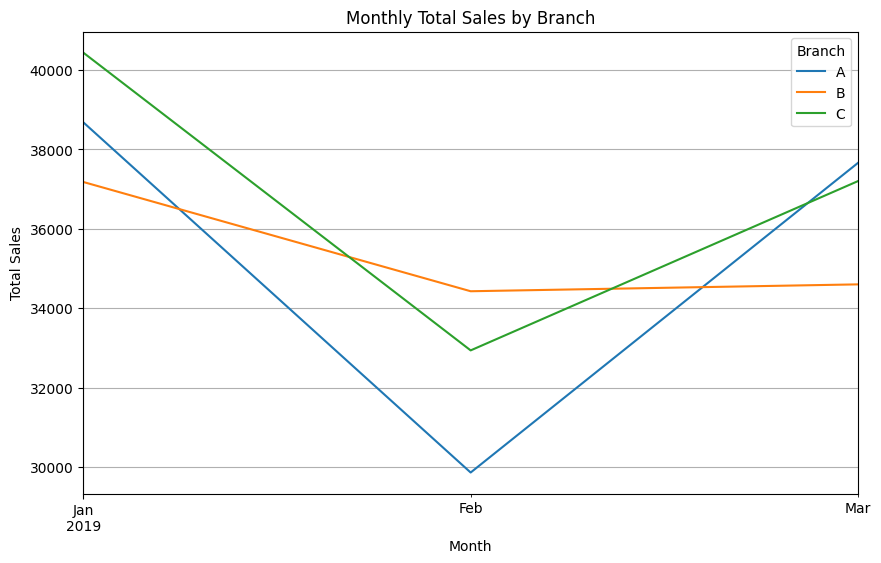

In [15]:
# Exploratory Data Analysis (EDA)
# Trends Analysis
monthly_sales = df.groupby([df['Date'].dt.to_period('M'), 'Branch'])['Total'].sum().unstack()
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Total Sales by Branch')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Branch')
plt.grid()
plt.show()

In [17]:
# Top product categories by quantity sold and revenue
top_categories_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
top_categories_revenue = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

In [19]:
top_categories_quantity

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

In [21]:
top_categories_revenue

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

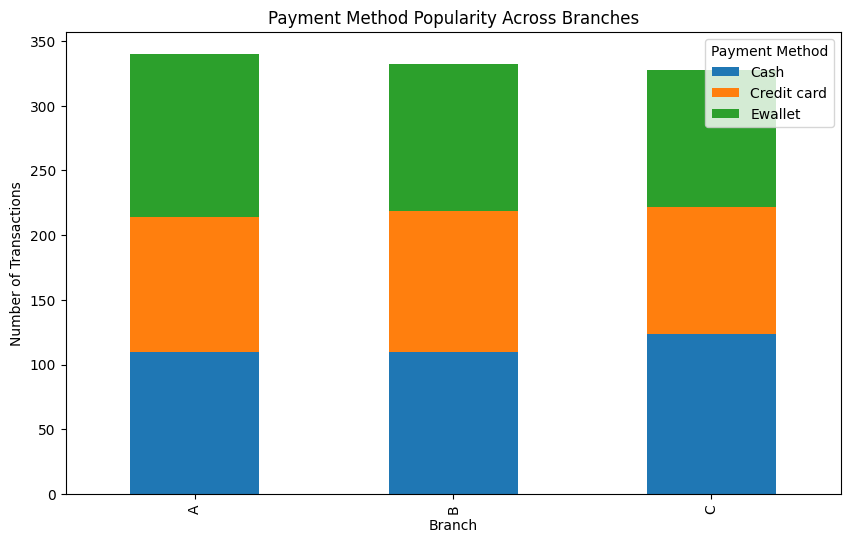

In [23]:
# Payment method popularity
payment_method_popularity = df.groupby(['Branch', 'Payment'])['Invoice ID'].count().unstack()
payment_method_popularity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Method Popularity Across Branches')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Method')
plt.show()

In [25]:
# Basic Predictive Modeling
# Prepare data for modeling
df['Branch_encoded'] = df['Branch'].astype('category').cat.codes
df['Product_line_encoded'] = df['Product line'].astype('category').cat.codes

In [27]:

X = df[['Product_line_encoded', 'Quantity', 'Unit price', 'Branch_encoded']]
y = df['Total']

In [29]:
X

,Product_line_encoded,Quantity,Unit price,Branch_encoded
0,3,7,74.69,0
1,0,5,15.28,2
2,4,7,46.33,0
3,3,8,58.22,0
4,5,7,86.31,0
...,...,...,...,...
995,3,1,40.35,2
996,4,10,97.38,1
997,2,1,31.84,0
998,4,1,65.82,0


In [31]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [37]:
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [39]:

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [41]:
mae_lr

58.405210774499594

In [43]:
mse_lr

6210.066580562084

In [45]:

# Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [47]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [49]:
mae_dt

6.4576575000000025

In [51]:
mse_dt


118.18968406875007

In [55]:
# Insights and Recommendations
print("Descriptive Statistics:")
print(f"Average Unit Price: {average_unit_price}")
print("Total Sales per Branch:")
print(total_sales_per_branch)

Descriptive Statistics:
Average Unit Price: 55.67213
Total Sales per Branch:
Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [57]:
print("Model Performance:")
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}")
print(f"Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}")

Model Performance:
Linear Regression - MAE: 58.405210774499594, MSE: 6210.066580562084
Decision Tree - MAE: 6.4576575000000025, MSE: 118.18968406875007
